(1599, 13)
(4898, 13)
(6497, 13)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality Label  
0      9.4        5   Red

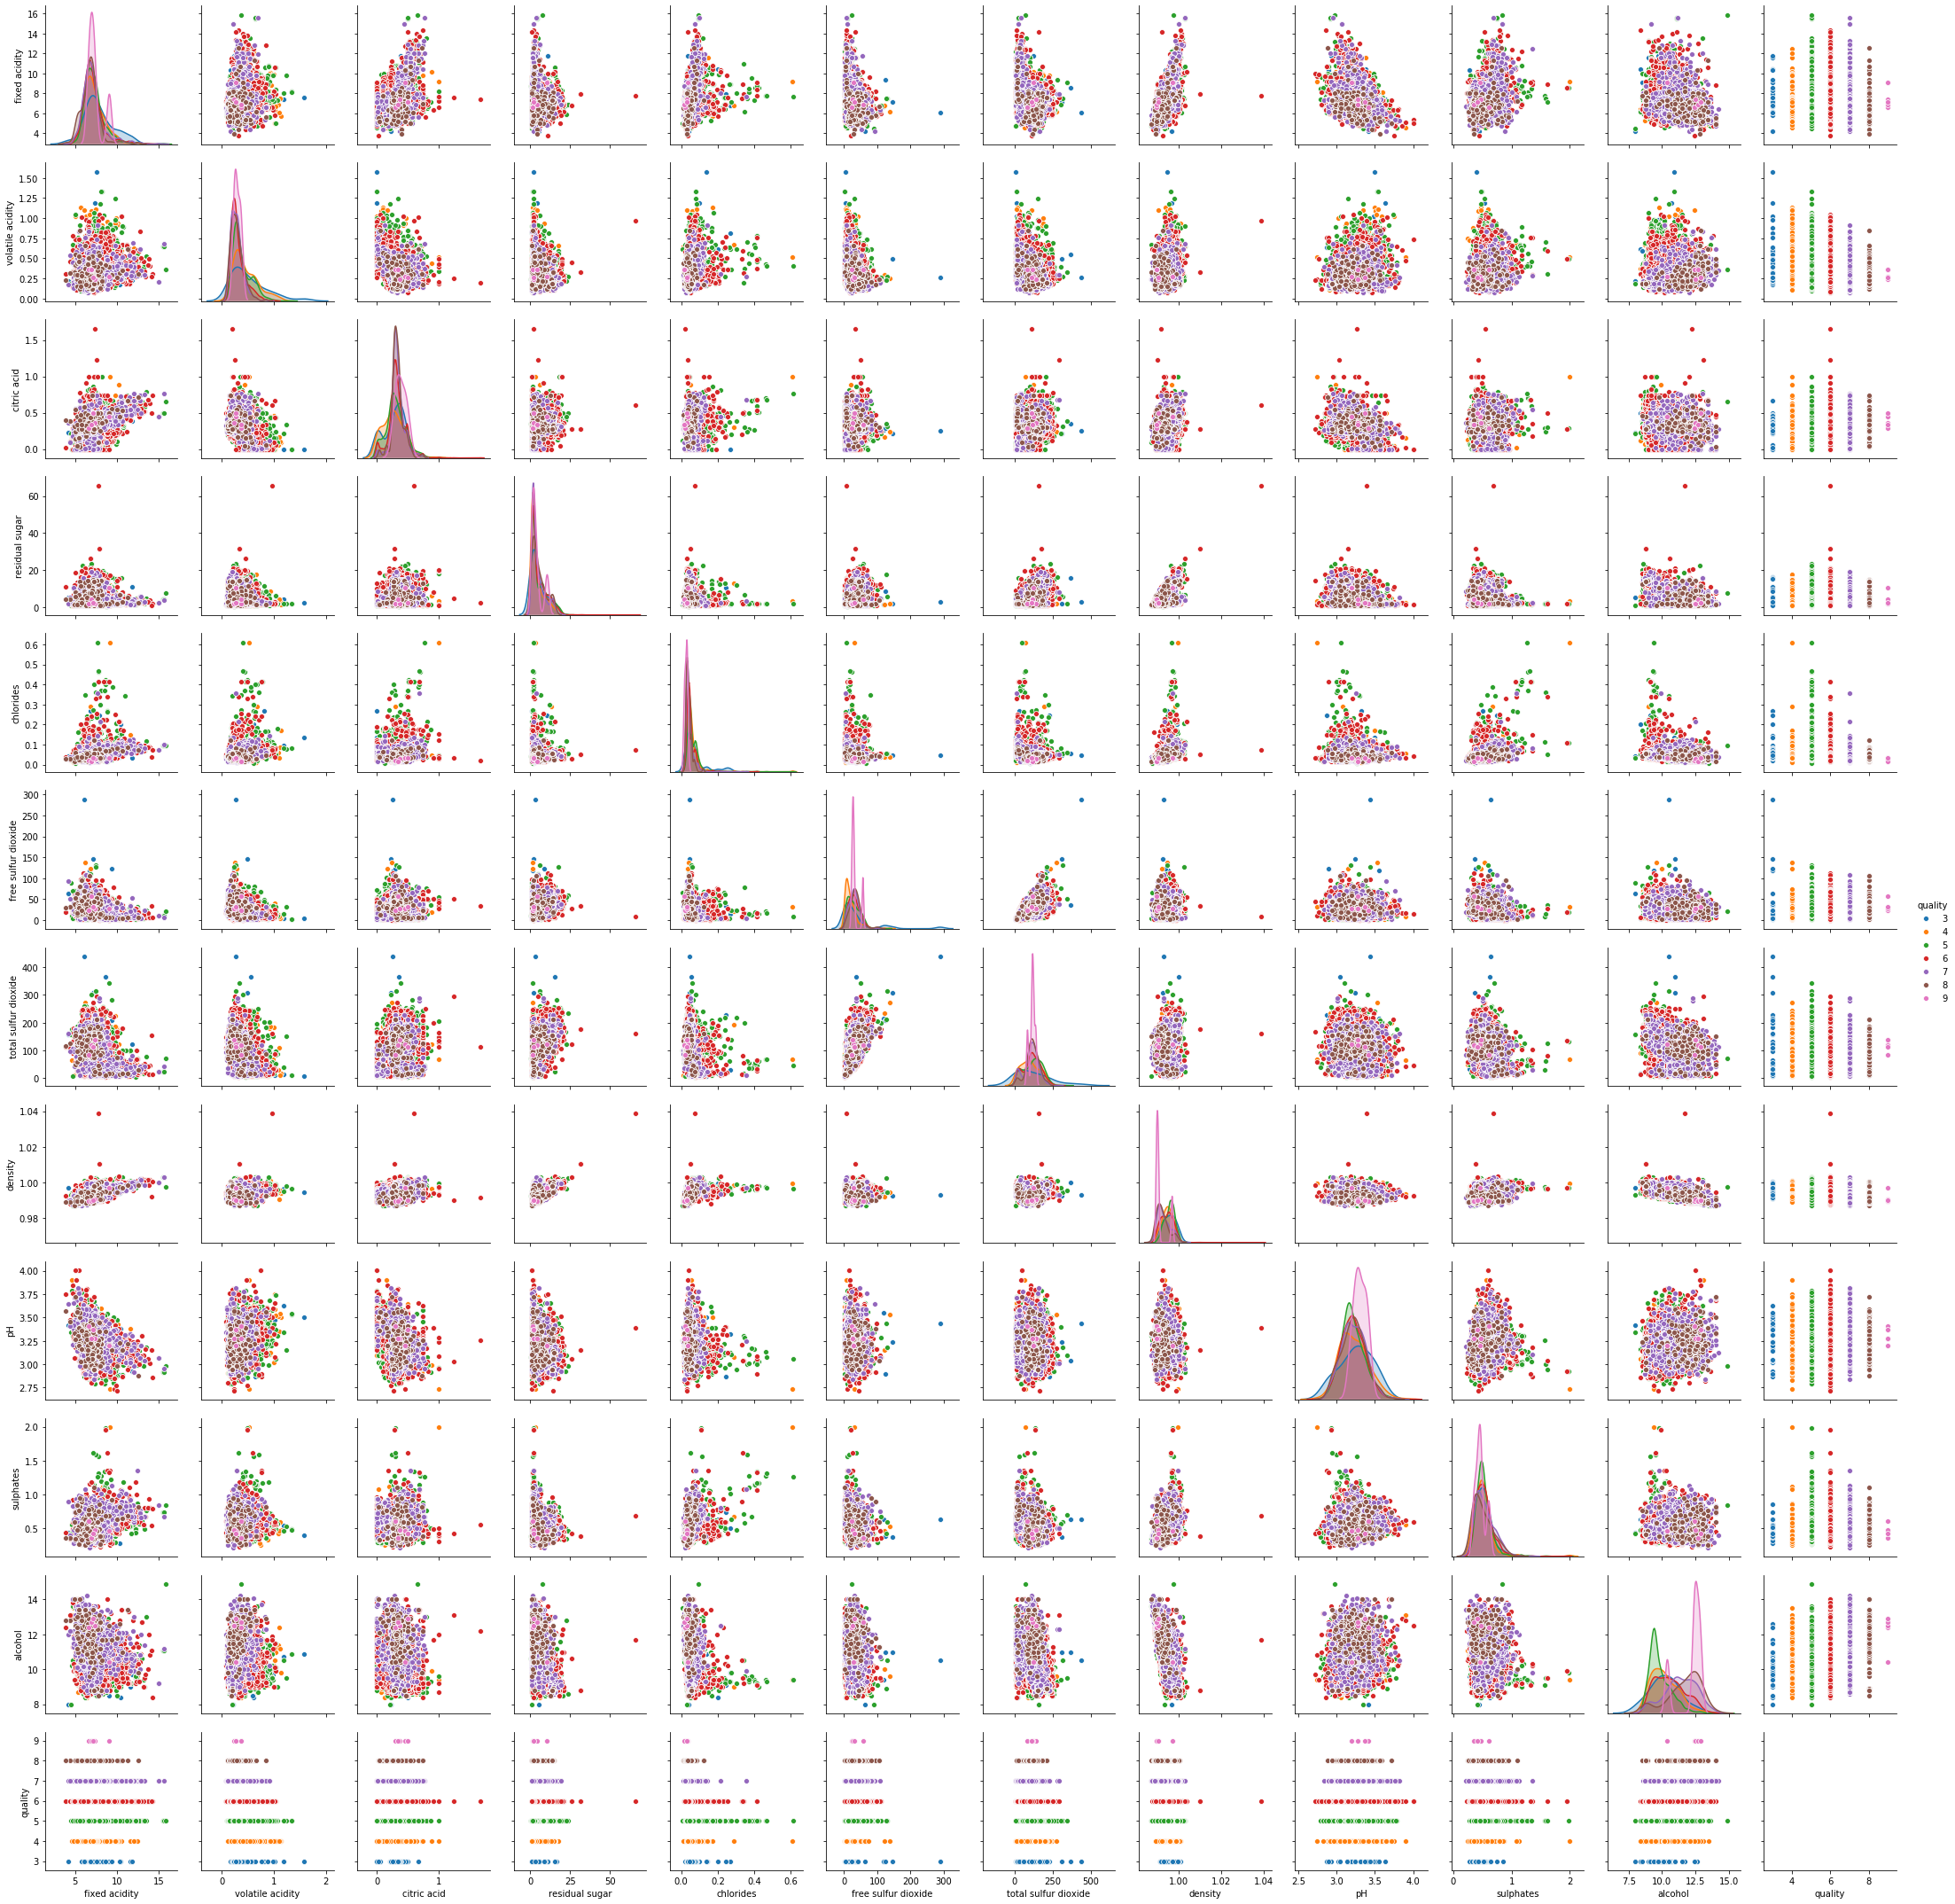

In [85]:
# Assignment 5: Machine Learning in Wine!!
import pandas as pd
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns 
import numpy as np 
import csv
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
import sklearn.metrics as metrics
from sklearn import metrics

red_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
reds = pd.read_csv(red_url, sep=';')
reds = reds[pd.notnull(reds)]
reds['Label'] = "Red"

white_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
whites = pd.read_csv(white_url, sep=';')
whites = whites[pd.notnull(whites)]
whites['Label'] = "White"
#label white or red


WineList = reds.append(whites)


# print(reds.head())
# print(whites.head())
print(reds.shape)
print(whites.shape)
print(WineList.shape)

print(reds.head())


sns.pairplot(WineList, hue = 'quality')

Red Wine Analysis

Correlations for Wine Traits:
fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

Error values:


'RMSE = 0.6455750670692046'

'RMSE_sklearn_way = 0.6455750670692046'


More metrics!!
R score: 
0.3605517030386881
Coefficients:
[ 2.49905527e-02 -1.08359026e+00 -1.82563948e-01  1.63312698e-02
 -1.87422516e+00  4.36133331e-03 -3.26457970e-03 -1.78811638e+01
 -4.13653144e-01  9.16334413e-01  2.76197699e-01]
Intercept:
21.965208449451893


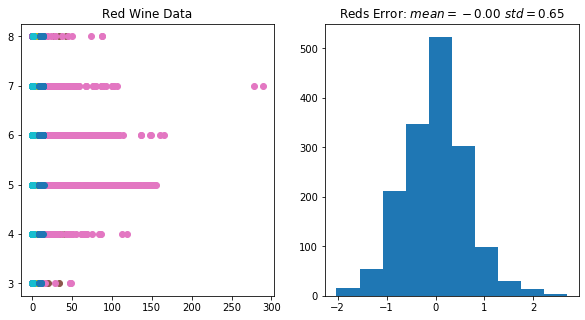

<Figure size 720x360 with 0 Axes>

In [93]:
# X = reds.iloc[:,:-3].values #All the columns I believe?
# Y = reds.iloc[:,-2].values # Second to last column or quality
print("Red Wine Analysis")
X= reds.drop(columns=['quality','Label'])
Y = reds['quality']

correlation = reds.corr()['quality']
print("\n" + "Correlations for Wine Traits:")
print(correlation)
#print(correlation)

f = plt.figure(figsize=(10,5))
ax = f.add_subplot(121)
ax.plot(X,Y,"o")
plt.title('Red Wine Data')

lr = LinearRegression()
fit = lr.fit(X,Y)

y_pred = fit.predict(X)
error = y_pred-Y

ax2 = f.add_subplot(122)
ax2.hist(error)
plt.title('Reds Error: ' + f"$mean={np.mean(error):.2f}\ std={np.std(error):.2f}$")

sse = np.sum(error**2)
rmse = np.sqrt(sse/len(X))
rmse_sklearn_way = np.sqrt(metrics.mean_squared_error(y_pred,Y))

print("\n" + "Error values:")
display("RMSE = " + str(rmse))
display("RMSE_sklearn_way = " + str(rmse_sklearn_way))
#ax = sns.pairplot(reds, hue = 'quality')
rscore = lr.score(X,Y)
print("\n" + "More metrics!!")
print("R score: ")
print(rscore)
print("Coefficients:")
print(lr.coef_)
print("Intercept:")
print(lr.intercept_)
f2 = plt.figure(figsize=(10,5))
# FILTER FOR MISSING DATA IF YOU NEED TO

White Wine Analysis

Correlations for Wine Traits:
fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64

Error values:


'RMSE = 0.7504359153109991'

'RMSE_sklearn_way = 0.7504359153109991'


More metrics!!
R score: 
0.28187036413328526
Coefficients:
[ 6.55199614e-02 -1.86317709e+00  2.20902007e-02  8.14828026e-02
 -2.47276537e-01  3.73276519e-03 -2.85747419e-04 -1.50284181e+02
  6.86343742e-01  6.31476473e-01  1.93475697e-01]
Intercept:
150.1928424812108


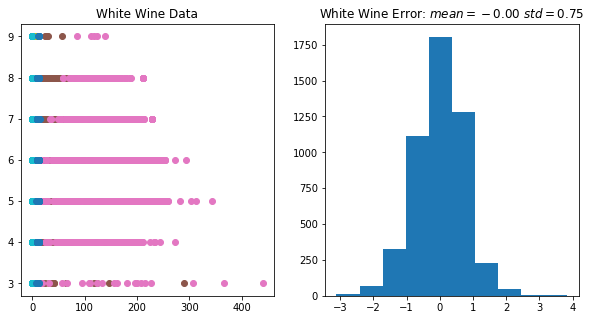

In [94]:
print("White Wine Analysis")
X= whites.drop(columns=['quality','Label'])
Y = whites['quality']

correlation = whites.corr()['quality']
print("\n" + "Correlations for Wine Traits:")
print(correlation)
#print(correlation)

f = plt.figure(figsize=(10,5))
ax = f.add_subplot(121)
ax.plot(X,Y,"o")
plt.title('White Wine Data')

lr = LinearRegression()
fit = lr.fit(X,Y)

y_pred = fit.predict(X)
error = y_pred-Y

ax2 = f.add_subplot(122)
ax2.hist(error)
plt.title('White Wine Error: ' + f"$mean={np.mean(error):.2f}\ std={np.std(error):.2f}$")

sse = np.sum(error**2)
rmse = np.sqrt(sse/len(X))
rmse_sklearn_way = np.sqrt(metrics.mean_squared_error(y_pred,Y))

print("\n" + "Error values:")
display("RMSE = " + str(rmse))
display("RMSE_sklearn_way = " + str(rmse_sklearn_way))
#ax = sns.pairplot(reds, hue = 'quality')
rscore = lr.score(X,Y)
print("\n" + "More metrics!!")
print("R score: ")
print(rscore)
print("Coefficients:")
print(lr.coef_)
print("Intercept:")
print(lr.intercept_)

Combined Wine Analysis

Correlations for Wine Traits:
fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

Error values:


'RMSE = 0.7346532973303375'

'RMSE_sklearn_way = 0.7346532973303375'


More metrics!!
R score: 
0.2921368850402044
Coefficients:
[ 6.76839156e-02 -1.32789221e+00 -1.09656648e-01  4.35587507e-02
 -4.83713531e-01  5.96988830e-03 -2.48129841e-03 -5.49669422e+01
  4.39296072e-01  7.68251760e-01  2.67030009e-01]
Intercept:
55.7627496117364

Residule Plots:


Text(0.5, 1.0, 'Quality vs Density')

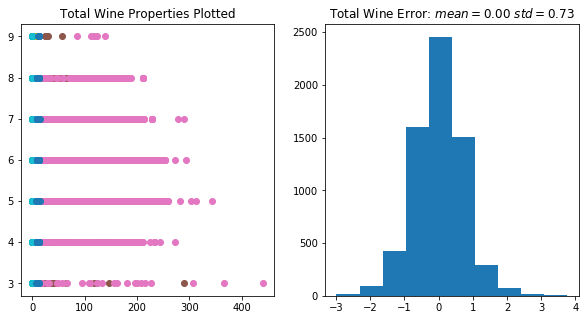

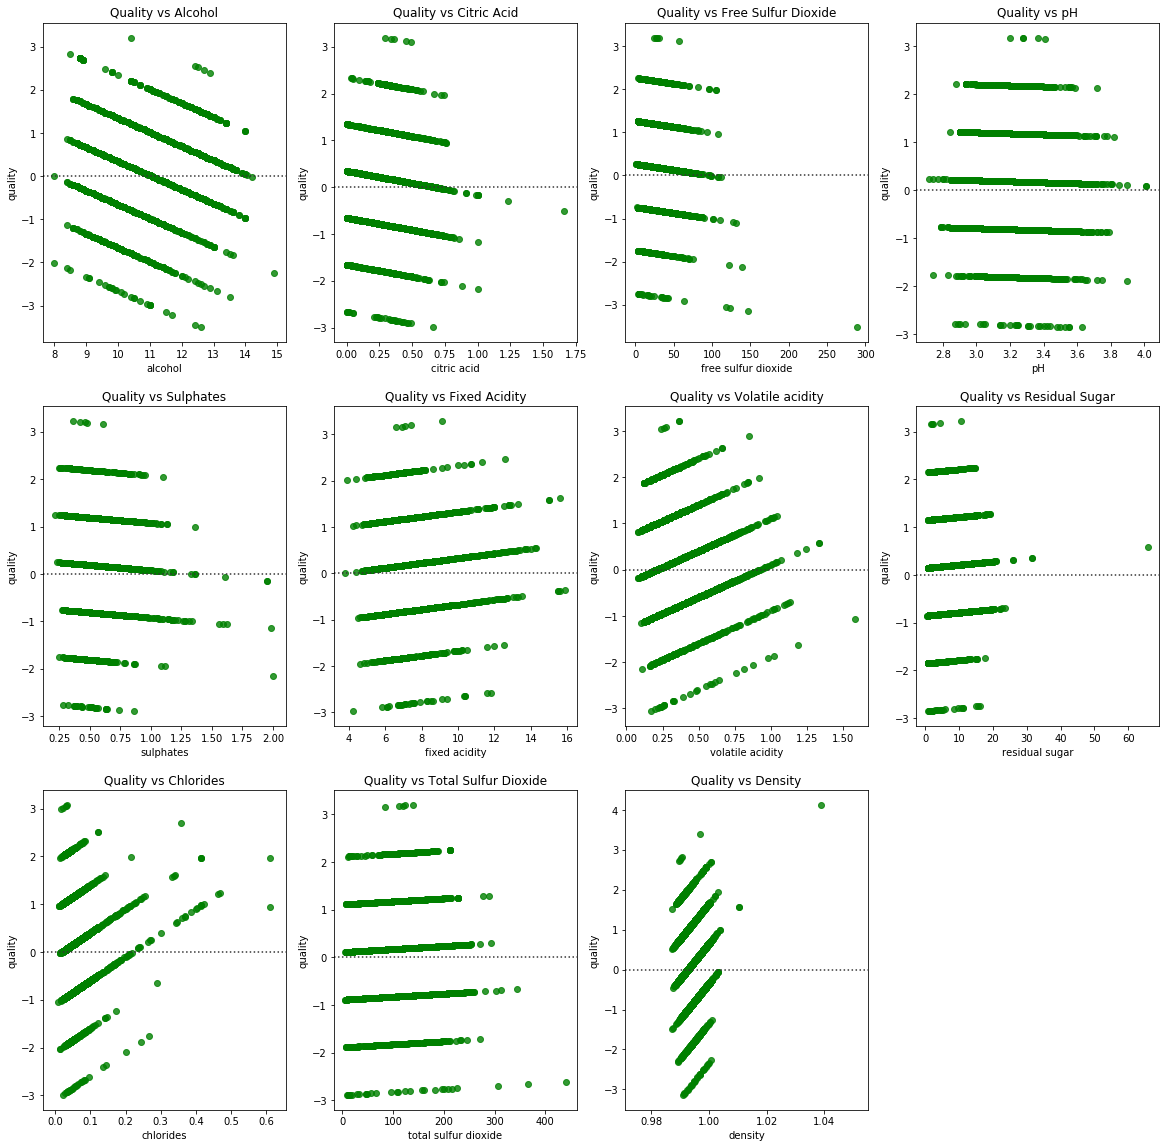

In [95]:
print("Combined Wine Analysis")
X= WineList.drop(columns=['quality','Label'])
Y = WineList['quality']

correlation = WineList.corr()['quality']
print("\n" + "Correlations for Wine Traits:")
print(correlation)
#print(correlation)

f = plt.figure(figsize=(10,5))
ax = f.add_subplot(121)
ax.plot(X,Y,"o")
plt.title('Total Wine Properties Plotted')


lr = LinearRegression()
fit = lr.fit(X,Y)

y_pred = fit.predict(X)
error = y_pred-Y

ax2 = f.add_subplot(122)
ax2.hist(error)
plt.title('Total Wine Error: ' + f"$mean={np.mean(error):.2f}\ std={np.std(error):.2f}$")

sse = np.sum(error**2)
rmse = np.sqrt(sse/len(X))
rmse_sklearn_way = np.sqrt(metrics.mean_squared_error(y_pred,Y))

print("\n" + "Error values:")
display("RMSE = " + str(rmse))
display("RMSE_sklearn_way = " + str(rmse_sklearn_way))
#ax = sns.pairplot(reds, hue = 'quality')
rscore = lr.score(X,Y)
print("\n" + "More metrics!!")
print("R score: ")
print(rscore)
print("Coefficients:")
print(lr.coef_)
print("Intercept:")
print(lr.intercept_)

f2 = plt.figure(figsize=(20,20))
print("\n" + "Residule Plots:")

axa = f2.add_subplot(341)
sns.residplot(WineList["alcohol"],Y, data = fit, color = "g").set_title("Quality vs Alcohol")
axa = f2.add_subplot(342)
sns.residplot(WineList["citric acid"],Y, data = fit, color = "g").set_title("Quality vs Citric Acid")
axa = f2.add_subplot(343)
sns.residplot(WineList["free sulfur dioxide"],Y, data = fit, color = "g").set_title("Quality vs Free Sulfur Dioxide")
axa = f2.add_subplot(344)
sns.residplot(WineList["pH"],Y, data = fit, color = "g").set_title("Quality vs pH")
axa = f2.add_subplot(345)
sns.residplot(WineList["sulphates"],Y, data = fit, color = "g").set_title("Quality vs Sulphates")
axa = f2.add_subplot(346)
sns.residplot(WineList["fixed acidity"],Y, data = fit, color = "g").set_title("Quality vs Fixed Acidity")
axa = f2.add_subplot(347)
sns.residplot(WineList["volatile acidity"],Y, data = fit, color = "g").set_title("Quality vs Volatile acidity")
axa = f2.add_subplot(348)
sns.residplot(WineList["residual sugar"],Y, data = fit, color = "g").set_title("Quality vs Residual Sugar")
axa = f2.add_subplot(349)
sns.residplot(WineList["chlorides"],Y, data = fit, color = "g").set_title("Quality vs Chlorides")
axa = f2.add_subplot(3,4,10)
sns.residplot(WineList["total sulfur dioxide"],Y, data = fit, color = "g").set_title("Quality vs Total Sulfur Dioxide")
axa = f2.add_subplot(3,4,11)
sns.residplot(WineList["density"],Y, data = fit, color = "g").set_title("Quality vs Density")


Cancer Survival Analysis

Haberdata:
   Age  Year  Nodes  Survival
0   30    64      1         1
1   30    62      3         1
2   30    65      0         1
3   31    59      2         1
4   31    65      4         1

Coefs and intercept


'[[ 0.01988257 -0.00975411  0.08838822]],[-1.86233569]'


Confusion Matrix


array([[215,  10],
       [ 67,  14]], dtype=int64)


List of incorrect rows:
     Age  Year  Nodes  Survival
7     34    59      0         2
8     34    66      9         2
9     34    58     30         1
34    39    66      0         2
44    41    64      0         2
..   ...   ...    ...       ...
287   70    66     14         1
293   72    63      0         2
299   74    65      3         2
304   78    65      1         2
305   83    58      2         2

[77 rows x 4 columns]

Classification Report:

              precision    recall  f1-score   support

           1       0.76      0.96      0.85       225
           2       0.58      0.17      0.27        81

    accuracy                           0.75       306
   macro avg       0.67      0.56      0.56       306
weighted avg       0.72      0.75      0.69       306



Text(0.5, 1.0, 'Survival: Age vs Years')

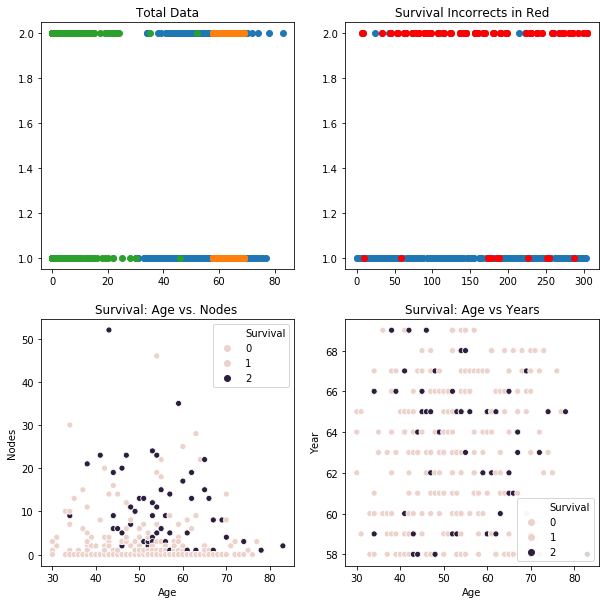

In [89]:
print("Cancer Survival Analysis" + "\n")

headerlist = ["Age","Year","Nodes","Survival"]
haberdata = pd.read_csv('haberman.data', names=headerlist, sep=',')
print("Haberdata:")
print(haberdata.head())
#print(haberdata.shape)

X = haberdata.drop(columns=['Survival'])
Y = haberdata['Survival']

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs')
fit = log_reg.fit(X,Y)
print("\n" + "Coefs and intercept")
display(f"{fit.coef_},{fit.intercept_}");
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(221)
ax.plot(X,Y,"o");
plt.title('Total Data')
#sns.pairplot(haberdata, hue="Survival")

from sklearn.metrics import confusion_matrix
y_pred = log_reg.predict(X)
print("\n" + "Confusion Matrix")
display(confusion_matrix(Y, y_pred))
incorrect = haberdata[y_pred != Y]
ax2 = f.add_subplot(222)   
ax2 = plt.plot(haberdata.Survival, "o")
ax2 = plt.plot(incorrect.Survival, "ro")
plt.title('Survival Incorrects in Red')
print("\n" + "List of incorrect rows:")
print(incorrect)

haberdata = haberdata.assign(y_pred = y_pred)
from sklearn.metrics import classification_report

print("\n" + "Classification Report:" + "\n")
print(classification_report(Y,y_pred))
#print(haberdata.head())
#Predict_Prob?

ax3 = f.add_subplot(223)
ax3 = sns.scatterplot(data = haberdata, x = "Age", y = "Nodes", hue = "Survival")
plt.title('Survival: Age vs. Nodes ')
ax4 = f.add_subplot(224)
ax4 = sns.scatterplot(data = haberdata, x = "Age", y = "Year", hue = "Survival")
plt.title('Survival: Age vs Years')